In [1]:
import os
os.getcwd()

'C:\\Users\\SRADHA\\Desktop\\Projects\\Models\\Logistic Regression'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

# Preprocessing

In [6]:
# Checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:ylabel='Age'>

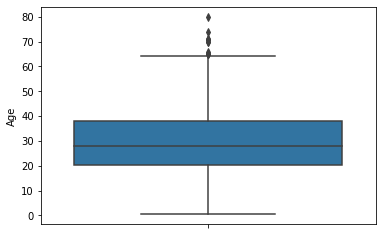

In [9]:
sns.boxplot(y='Age',data=df)

In [10]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [11]:
df=df.drop(['Cabin'],axis=1)

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df['Embarked']=df['Embarked'].fillna('S')

In [14]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [17]:
# Drop alive as it is same as survived
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
# Fare column can also be dropped as it is insignificant for the passenger who survived or didn't survive
df=df.drop(['Fare'],axis=1)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [22]:
# Encoding
df['Sex']=df['Sex'].astype('category')
df['Sex']=df['Sex'].cat.codes

df['Embarked']=df['Embarked'].astype('category')
df['Embarked']=df['Embarked'].cat.codes

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [24]:
df=pd.get_dummies(df,columns=['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1,0,0,0,1
1,1,1,0,38.0,1,0,1,0,0
2,1,3,0,26.0,0,0,0,0,1
3,1,1,0,35.0,1,0,0,0,1
4,0,3,1,35.0,0,0,0,0,1


In [25]:
df=df.drop(['Embarked_0'],axis=1)

In [26]:
df=pd.get_dummies(df,columns=['Pclass'])
df.head()

,Survived,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,1,0,0,1
1,1,0,38.0,1,0,0,0,1,0,0
2,1,0,26.0,0,0,0,1,0,0,1
3,1,0,35.0,1,0,0,1,1,0,0
4,0,1,35.0,0,0,0,1,0,0,1


In [27]:
df=df.drop(['Pclass_1'],axis=1)

In [28]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,0,0,0,0
2,1,0,26.0,0,0,0,1,0,1
3,1,0,35.0,1,0,0,1,0,0
4,0,1,35.0,0,0,0,1,0,1


In [29]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

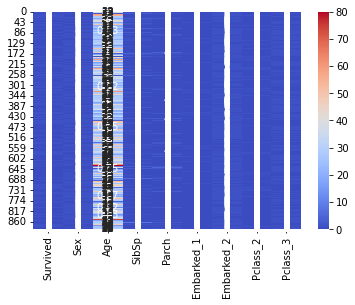

In [30]:
sns.heatmap(df,annot=True,cmap='coolwarm')

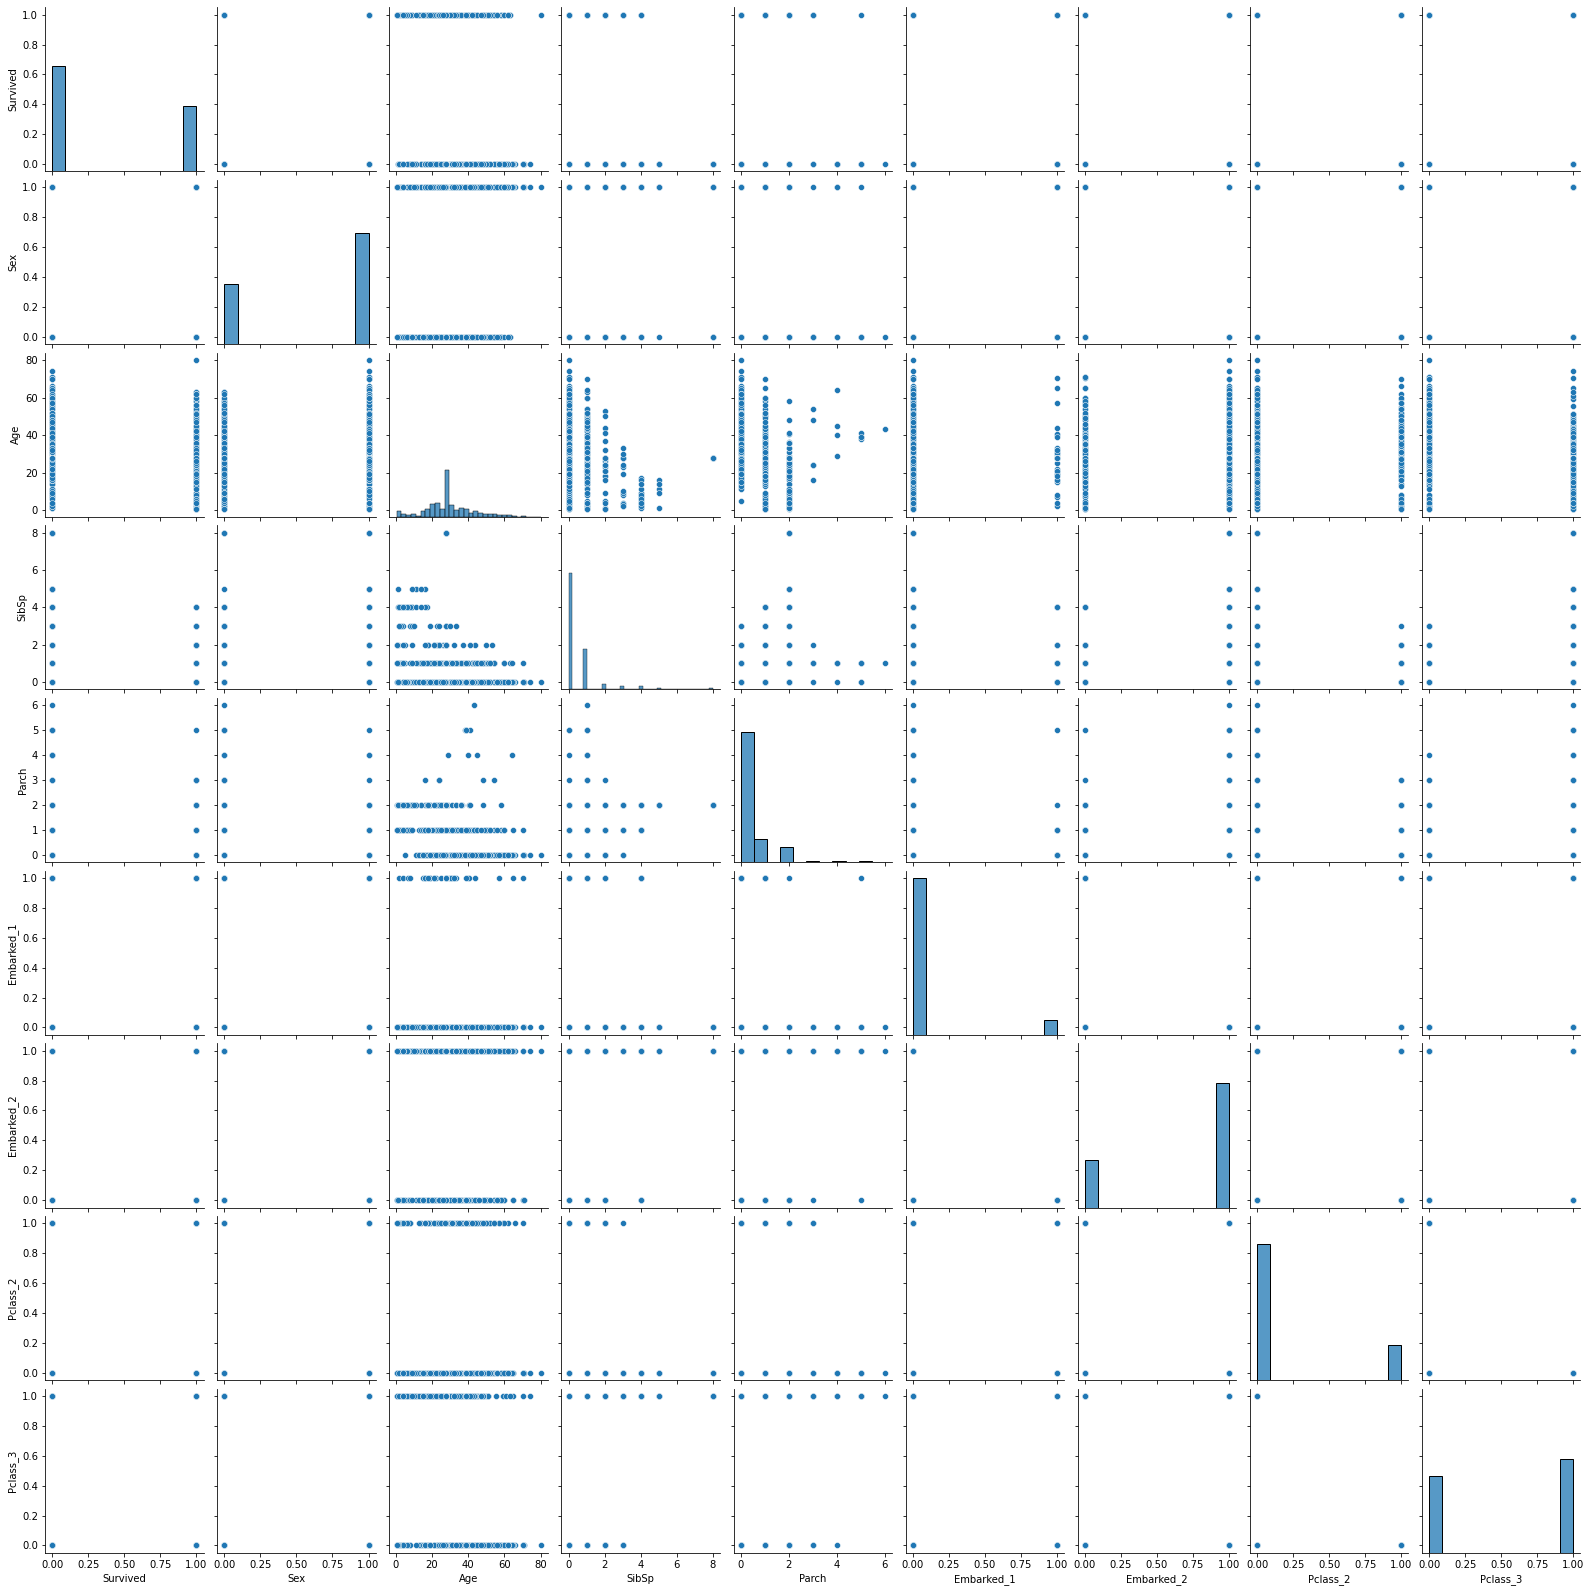

In [31]:
sns.pairplot(df)

In [32]:
# Splitting the data into dependent and independent variables
x=df.iloc[:,1:]
y=df['Survived']

In [33]:
x.head()

,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2,Pclass_2,Pclass_3
0,1,22.0,1,0,0,1,0,1
1,0,38.0,1,0,0,0,0,0
2,0,26.0,0,0,0,1,0,1
3,0,35.0,1,0,0,1,0,0
4,1,35.0,0,0,0,1,0,1


In [34]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
# Splitting the data into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 8)
(223, 8)
(668,)
(223,)


# Building Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred_train_logit=logit_model.predict(x_train)
y_pred_test_logit=logit_model.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print("Accuracy score of training dataset:",accuracy_score(y_train,y_pred_train_logit))
print("Accuracy score of test dataset:",accuracy_score(y_test,y_pred_test_logit))

Accuracy score of training dataset: 0.8098802395209581
Accuracy score of test dataset: 0.8071748878923767


# K-Fold Method (Cross validation Approach)

In [40]:
# for improving the accuracy
from sklearn.model_selection import cross_val_score
accuracy_training=cross_val_score(logit_model,x_train,y_train,cv=15)
accuracy_test=cross_val_score(logit_model,x_test,y_test,cv=15)
print("Accuracy score of training dataset:",accuracy_training[8])
print("Accuracy score of test dataset:",accuracy_test[12])

Accuracy score of training dataset: 0.9090909090909091
Accuracy score of test dataset: 0.8666666666666667


# Decision Tree Model

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred_train_dt=dt.predict(x_train)
y_pred_test_dt=dt.predict(x_test)

In [43]:
print("Accuracy score of training dataset:",accuracy_score(y_train,y_pred_train_dt))
print("Accuracy score of test dataset:",accuracy_score(y_test,y_pred_test_dt))

Accuracy score of training dataset: 0.9550898203592815
Accuracy score of test dataset: 0.7713004484304933


# Random Forest Model

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=32)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=32)

In [45]:
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)

In [46]:
print("Accuracy score of training dataset:",accuracy_score(y_train,y_pred_train_rf))
print("Accuracy score of test dataset:",accuracy_score(y_test,y_pred_test_rf))

Accuracy score of training dataset: 0.9550898203592815
Accuracy score of test dataset: 0.7757847533632287


# XGBoost Model

In [47]:
import xgboost

In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [49]:
y_pred_train_xgb=xgb.predict(x_train)
y_pred_test_xgb=xgb.predict(x_test)

In [50]:
print("Accuracy score of training dataset:",accuracy_score(y_train,y_pred_train_rf))
print("Accuracy score of test dataset:",accuracy_score(y_test,y_pred_test_rf))

Accuracy score of training dataset: 0.9550898203592815
Accuracy score of test dataset: 0.7757847533632287


# Grid Search CV

In [52]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_rf={'n_estimators':[10,50,100],
            'criterion':["gini","entropy"],
            'max_depth':[50,60,70,80],
            'max_features': [2, 3, 4, 5],
            'min_samples_leaf': [3, 4, 5, 6, 7],
            'min_samples_split': [8, 10, 12]}

In [56]:
grid_rf=GridSearchCV(RandomForestClassifier(),param_rf,cv=3,n_jobs=-1, verbose=True, refit=True)
grid_rf.fit(x_train,y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [50, 60, 70, 80],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 50, 100]},
             verbose=True)

In [57]:
grid_rf_predict_train=grid_rf.predict(x_train)
grid_rf_predict_test=grid_rf.predict(x_test)

In [58]:
print('Accuracy score of Train dataset:',accuracy_score(y_train,grid_rf_predict_train))
print('####'*20)
print('Accuracy score of Test dataset:',accuracy_score(y_test,grid_rf_predict_test))
print('\n')
print(f'Best Tuned Hyperparameter k: {grid_rf.best_params_}')

Accuracy score of Train dataset: 0.8607784431137725
################################################################################
Accuracy score of Test dataset: 0.7847533632286996


Best Tuned Hyperparameter k: {'criterion': 'gini', 'max_depth': 50, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 10}


In [59]:
param_xgb={'n_estimators':[10,50,100],
           "learning_rate": (0.05, 0.10, 0.15),
            "max_depth": [ 3, 4, 5, 6, 8],
            "min_child_weight": [ 1, 3, 5, 7],
            "gamma":[ 0.0, 0.1, 0.2],
            "colsample_bytree":[ 0.3, 0.4]}

In [60]:
grid_xgb=GridSearchCV(XGBClassifier(),param_xgb, cv=3, n_jobs=-1, verbose=True, refit=True)
grid_xgb.fit(x_train,y_train)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4],
                         'gamma': [0.0, 0.1, 0.2],
                         'learning_rate': (0.05, 0.1, 0.15),
                         'max_depth': [3, 4, 5, 6, 8],
                         'min_child_weight': [1, 3, 5, 7],
                         'n_estimators': [10, 50, 100]},
             verbose=True)

In [61]:
grid_xgb_predict_train=grid_xgb.predict(x_train)
grid_xgb_predict_test=grid_xgb.predict(x_test)

In [62]:
print('Accuracy score of Train dataset:',accuracy_score(y_train,grid_xgb_predict_train))
print('####'*20)
print('Accuracy score of Test dataset:',accuracy_score(y_test,grid_xgb_predict_test))
print('\n')
print(f'Best Tuned Hyperparameter k: {grid_xgb.best_params_}')

Accuracy score of Train dataset: 0.8622754491017964
################################################################################
Accuracy score of Test dataset: 0.7982062780269058


Best Tuned Hyperparameter k: {'colsample_bytree': 0.3, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 100}


# Test File

In [63]:
test_file=pd.read_csv('test.csv')
test_file.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
test=test_file[['Sex','Age','SibSp','Parch','Embarked','Pclass']]
test.head()

,Sex,Age,SibSp,Parch,Embarked,Pclass
0,male,34.5,0,0,Q,3
1,female,47.0,1,0,S,3
2,male,62.0,0,0,Q,2
3,male,27.0,0,0,S,3
4,female,22.0,1,1,S,3


In [65]:
test.isnull().sum()

Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
Pclass       0
dtype: int64

In [66]:
test['Age']=test['Age'].fillna(test['Age'].median())

In [67]:
test.isnull().sum()

Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Pclass      0
dtype: int64

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    object 
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Embarked  418 non-null    object 
 5   Pclass    418 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [69]:
test['Sex']=test['Sex'].astype('category')
test['Sex']=test['Sex'].cat.codes

In [70]:
test['Embarked']=test['Embarked'].astype('category')
test['Embarked']=test['Embarked'].cat.codes
test=pd.get_dummies(test,columns=['Embarked'])
test.head()

,Sex,Age,SibSp,Parch,Pclass,Embarked_0,Embarked_1,Embarked_2
0,1,34.5,0,0,3,0,1,0
1,0,47.0,1,0,3,0,0,1
2,1,62.0,0,0,2,0,1,0
3,1,27.0,0,0,3,0,0,1
4,0,22.0,1,1,3,0,0,1


In [71]:
test=test.drop(['Embarked_0'],axis=1)

In [72]:
test.head()

,Sex,Age,SibSp,Parch,Pclass,Embarked_1,Embarked_2
0,1,34.5,0,0,3,1,0
1,0,47.0,1,0,3,0,1
2,1,62.0,0,0,2,1,0
3,1,27.0,0,0,3,0,1
4,0,22.0,1,1,3,0,1


In [73]:
test=pd.get_dummies(test,columns=['Pclass'])
test.head()

,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3
0,1,34.5,0,0,1,0,0,0,1
1,0,47.0,1,0,0,1,0,0,1
2,1,62.0,0,0,1,0,0,1,0
3,1,27.0,0,0,0,1,0,0,1
4,0,22.0,1,1,0,1,0,0,1


In [75]:
test=test.drop(['Pclass_1'],axis=1)
test.head()

,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2,Pclass_2,Pclass_3
0,1,34.5,0,0,1,0,0,1
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


In [74]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,0,0,0,0
2,1,0,26.0,0,0,0,1,0,1
3,1,0,35.0,1,0,0,1,0,0
4,0,1,35.0,0,0,0,1,0,1


# Predicting the dependent variable of test dataset

In [76]:
y_pred_test_file=grid_xgb.predict(test)

In [77]:
y_pred_test_file=pd.DataFrame(y_pred_test_file)
y_pred_test_file

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [82]:
new_data=pd.concat([test_file,y_pred_test_file],axis=1)
new_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [83]:
new_data = new_data.drop(['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
new_data.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [84]:
column_name=[['PassengerId','Survived']]
new_data.columns=column_name

In [85]:
new_data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [86]:
new_data.to_csv('gender_submission1.csv')